In [1]:
#IMPORTED THE DATASET OF MOVIES
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

movies = pd.read_csv('tmdb_5000_movies.csv')

In [2]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [4]:
#CHECKING THE NUMBER OF NULL VALUES IN THE DATASET

movies.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [5]:
#DROPPING THE NULL VALUES OF THE DATASET

movies.dropna(inplace = True)

In [6]:
movies.isnull().sum()

budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
dtype: int64

In [7]:
#CHECKING NUMBER OF DUPLICATED VALUES IN THE DATASET

movies.duplicated().sum()

0

In [8]:
movies.shape

(1493, 20)

In [9]:
#IMPORTED THE DATASET OF CREDITS

credits = pd.read_csv('tmdb_5000_credits.csv')

In [10]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [11]:
credits['movie_id'][0:10]

0     19995
1       285
2    206647
3     49026
4     49529
5       559
6     38757
7     99861
8       767
9    209112
Name: movie_id, dtype: int64

In [12]:
#CHECKING THE NUMBER OF NULL VALUES IN THE DATASET

credits.isnull().sum()

movie_id    0
title       0
cast        0
crew        0
dtype: int64

In [13]:
#CHECKING NUMBER OF DUPLICATED VALUES IN THE DATASET

credits.duplicated().sum()

0

In [14]:
credits.shape

(4803, 4)

In [15]:
#MERGED THE BOTH DATASET BASED ON TITLE AS PRIMARY KEY

movies = movies.merge(credits,on='title')
movies.shape

(1494, 23)

In [16]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1494 entries, 0 to 1493
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                1494 non-null   int64  
 1   genres                1494 non-null   object 
 2   homepage              1494 non-null   object 
 3   id                    1494 non-null   int64  
 4   keywords              1494 non-null   object 
 5   original_language     1494 non-null   object 
 6   original_title        1494 non-null   object 
 7   overview              1494 non-null   object 
 8   popularity            1494 non-null   float64
 9   production_companies  1494 non-null   object 
 10  production_countries  1494 non-null   object 
 11  release_date          1494 non-null   object 
 12  revenue               1494 non-null   int64  
 13  runtime               1494 non-null   float64
 14  spoken_languages      1494 non-null   object 
 15  status               

In [17]:
# Checking whether the str or not

type(movies.release_date[0])

str

In [18]:
movies.title[0]

'Avatar'

In [19]:
''' We are using only TITLE, BUDGET, GENRES, KEYWORDS, CREW, CAST, MOVIE_ID, 
RUNTIME, REVENUE, POPULARITY, VOTE_COUNT, VOTE_AVERAGE '''

movies = movies[['title','genres','movie_id','overview','runtime','popularity','cast','crew','release_date','keywords','vote_average','vote_count','budget','revenue']]

In [20]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1494 entries, 0 to 1493
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1494 non-null   object 
 1   genres        1494 non-null   object 
 2   movie_id      1494 non-null   int64  
 3   overview      1494 non-null   object 
 4   runtime       1494 non-null   float64
 5   popularity    1494 non-null   float64
 6   cast          1494 non-null   object 
 7   crew          1494 non-null   object 
 8   release_date  1494 non-null   object 
 9   keywords      1494 non-null   object 
 10  vote_average  1494 non-null   float64
 11  vote_count    1494 non-null   int64  
 12  budget        1494 non-null   int64  
 13  revenue       1494 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 207.4+ KB


In [21]:
movies.head(1)

,title,genres,movie_id,overview,runtime,popularity,cast,crew,release_date,keywords,vote_average,vote_count,budget,revenue
0,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"In the 22nd century, a paraplegic Marine is di...",162.0,150.437577,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2009-12-10,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",7.2,11800,237000000,2787965087


In [22]:
movies.genres.unique()[0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [23]:
# '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'
# Convert above all the genres details into categorical form as ['Action','Adventure','Friction','Sci-Fi']

import ast
ast.literal_eval

<function ast.literal_eval(node_or_string)>

In [24]:
def convert(obj):
    L = []
    for i in ast.literal_eval(obj):
        L.append(i['name'])
    return L

In [25]:
# Similarly we used for the Cast Column in the dataset
# Takes only the first three dictinaries of the cast only

def convert3(obj):
    L = []
    counter = 0
    for i in ast.literal_eval(obj):
        if counter != 3:
            L.append(i['name'])
            counter += 1
        else:
            break
    return L

In [26]:
# To fetch the details of the director in the movie

def fetch_director(obj):
    L = []
    for i in ast.literal_eval(obj):
        if i['job'] == 'Director':
            L.append(i['name'])
            break
    return L

In [27]:
# Changing the Data in the column genres into useful data

movies['genres'] = movies['genres'].apply(convert)
movies['keywords'] = movies['keywords'].apply(convert)

In [28]:
movies.head(1)

,title,genres,movie_id,overview,runtime,popularity,cast,crew,release_date,keywords,vote_average,vote_count,budget,revenue
0,Avatar,"[Action, Adventure, Fantasy, Science Fiction]",19995,"In the 22nd century, a paraplegic Marine is di...",162.0,150.437577,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2009-12-10,"[culture clash, future, space war, space colon...",7.2,11800,237000000,2787965087


In [29]:
# Updating the cast column by having first three casts of the movies
movies['cast'] = movies['cast'].apply(convert3)

# Updating the crew column by using only the director name of the movie 

movies['crew'] = movies['crew'].apply(fetch_director)

In [30]:
movies.head(1)

,title,genres,movie_id,overview,runtime,popularity,cast,crew,release_date,keywords,vote_average,vote_count,budget,revenue
0,Avatar,"[Action, Adventure, Fantasy, Science Fiction]",19995,"In the 22nd century, a paraplegic Marine is di...",162.0,150.437577,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron],2009-12-10,"[culture clash, future, space war, space colon...",7.2,11800,237000000,2787965087


In [31]:
''' We would found some problems in the recommendation as 
(If you are searching for Sam Worthingthon, We can Recommend other Sam like Sam Mendes)'''

movies['genres'] = movies['genres'].apply(lambda x:[i.replace(" ","") for i in x])
movies['keywords'] = movies['keywords'].apply(lambda x:[i.replace(" ","") for i in x])
movies['cast'] = movies['cast'].apply(lambda x:[i.replace(" ","") for i in x])
movies['crew'] = movies['crew'].apply(lambda x:[i.replace(" ","") for i in x])

In [32]:
movies.head(1)

,title,genres,movie_id,overview,runtime,popularity,cast,crew,release_date,keywords,vote_average,vote_count,budget,revenue
0,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]",19995,"In the 22nd century, a paraplegic Marine is di...",162.0,150.437577,"[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],2009-12-10,"[cultureclash, future, spacewar, spacecolony, ...",7.2,11800,237000000,2787965087


In [33]:
# Joining all the tag columns words in to a paragragh

movies['genres'] = movies['genres'].apply(lambda x:" ".join(x))
movies['cast'] = movies['cast'].apply(lambda x:" ".join(x))
movies['keywords'] = movies['keywords'].apply(lambda x:" ".join(x))
movies['overview'] = movies['overview'].apply(lambda x:" ".join(x))
movies['crew'] = movies['crew'].apply(lambda x:" ".join(x))

In [34]:
movies.head(1)

,title,genres,movie_id,overview,runtime,popularity,cast,crew,release_date,keywords,vote_average,vote_count,budget,revenue
0,Avatar,Action Adventure Fantasy ScienceFiction,19995,"I n t h e 2 2 n d c e n t u r y , a ...",162.0,150.437577,SamWorthington ZoeSaldana SigourneyWeaver,JamesCameron,2009-12-10,cultureclash future spacewar spacecolony socie...,7.2,11800,237000000,2787965087


In [35]:
movies['tag'] = movies['overview'] + movies['genres'] + movies['cast'] + movies['crew'] + movies['keywords']

In [36]:
movies.tag[0]

'I n   t h e   2 2 n d   c e n t u r y ,   a   p a r a p l e g i c   M a r i n e   i s   d i s p a t c h e d   t o   t h e   m o o n   P a n d o r a   o n   a   u n i q u e   m i s s i o n ,   b u t   b e c o m e s   t o r n   b e t w e e n   f o l l o w i n g   o r d e r s   a n d   p r o t e c t i n g   a n   a l i e n   c i v i l i z a t i o n .Action Adventure Fantasy ScienceFictionSamWorthington ZoeSaldana SigourneyWeaverJamesCameroncultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d'

In [37]:
movies.shape

(1494, 15)

In [38]:
# IN THE DATA ANALYSIS WE ARE GOING TO FIND 
# 1. MOST POPULAR MOVIES
# 2. SHORTEST AND LONGEST MOVIES
# 3. HAVE LONGER MOVIES MOST POPULAR THAN SHORTER RUN TIME MOVIES
# 4. Did longer movies have higher average vote ratings from 1960 to 2015?
# 5. Do movies having higher budget more popular than movies with lower budget?
# 6. What was the proportion of movies for each genre from 1960 to 2015?
# 7. Get the top 10 actors who have acted in most movies from 1960 to 2015. 
# 8. Get the top 10 movies with avergae vote ratings.
# 9. Get the top 10 movies with popularity.
# 10.Get the top 10 directors with max Popularity.
# 11.From 1960 to 2015,in total which was the favourite month for producers to release their movies?

In [39]:
movies.head(1)

,title,genres,movie_id,overview,runtime,popularity,cast,crew,release_date,keywords,vote_average,vote_count,budget,revenue,tag
0,Avatar,Action Adventure Fantasy ScienceFiction,19995,"I n t h e 2 2 n d c e n t u r y , a ...",162.0,150.437577,SamWorthington ZoeSaldana SigourneyWeaver,JamesCameron,2009-12-10,cultureclash future spacewar spacecolony socie...,7.2,11800,237000000,2787965087,"I n t h e 2 2 n d c e n t u r y , a ..."


In [40]:
movies1 = movies.copy()

In [41]:
movies1.head(2)

,title,genres,movie_id,overview,runtime,popularity,cast,crew,release_date,keywords,vote_average,vote_count,budget,revenue,tag
0,Avatar,Action Adventure Fantasy ScienceFiction,19995,"I n t h e 2 2 n d c e n t u r y , a ...",162.0,150.437577,SamWorthington ZoeSaldana SigourneyWeaver,JamesCameron,2009-12-10,cultureclash future spacewar spacecolony socie...,7.2,11800,237000000,2787965087,"I n t h e 2 2 n d c e n t u r y , a ..."
1,Pirates of the Caribbean: At World's End,Adventure Fantasy Action,285,"C a p t a i n B a r b o s s a , l o n g ...",169.0,139.082615,JohnnyDepp OrlandoBloom KeiraKnightley,GoreVerbinski,2007-05-19,ocean drugabuse exoticisland eastindiatradingc...,6.9,4500,300000000,961000000,"C a p t a i n B a r b o s s a , l o n g ..."


In [42]:
movies1['tag'][0]

'I n   t h e   2 2 n d   c e n t u r y ,   a   p a r a p l e g i c   M a r i n e   i s   d i s p a t c h e d   t o   t h e   m o o n   P a n d o r a   o n   a   u n i q u e   m i s s i o n ,   b u t   b e c o m e s   t o r n   b e t w e e n   f o l l o w i n g   o r d e r s   a n d   p r o t e c t i n g   a n   a l i e n   c i v i l i z a t i o n .Action Adventure Fantasy ScienceFictionSamWorthington ZoeSaldana SigourneyWeaverJamesCameroncultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d'

In [43]:
## split then genre column and convert it to an array 
## eg 'Action|Thriller|Horror' = ['Action','Thriller','Horror']
movies1['genres'] = movies1.genres.str.split('|')

In [44]:
## Now we use explode function
## to give each genre its individual row
movies1_genre_multiple = movies1.explode('genres')
movies1_genre_multiple.head(1)

,title,genres,movie_id,overview,runtime,popularity,cast,crew,release_date,keywords,vote_average,vote_count,budget,revenue,tag
0,Avatar,Action Adventure Fantasy ScienceFiction,19995,"I n t h e 2 2 n d c e n t u r y , a ...",162.0,150.437577,SamWorthington ZoeSaldana SigourneyWeaver,JamesCameron,2009-12-10,cultureclash future spacewar spacecolony socie...,7.2,11800,237000000,2787965087,"I n t h e 2 2 n d c e n t u r y , a ..."


In [45]:
type(movies1.release_date[0])

str

In [46]:
from datetime import datetime

movies1['release_date'] = pd.to_datetime(movies1['release_date'])
movies1['year'] = movies1['release_date'].dt.year

movies1.head(1)

,title,genres,movie_id,overview,runtime,popularity,cast,crew,release_date,keywords,vote_average,vote_count,budget,revenue,tag,year
0,Avatar,[Action Adventure Fantasy ScienceFiction],19995,"I n t h e 2 2 n d c e n t u r y , a ...",162.0,150.437577,SamWorthington ZoeSaldana SigourneyWeaver,JamesCameron,2009-12-10,cultureclash future spacewar spacecolony socie...,7.2,11800,237000000,2787965087,"I n t h e 2 2 n d c e n t u r y , a ...",2009


In [47]:
## Now we use explode function
## to give each genre its individual row
movies1_genre_multiple = movies1.explode('genres')
movies1_genre_multiple.head(1)

,title,genres,movie_id,overview,runtime,popularity,cast,crew,release_date,keywords,vote_average,vote_count,budget,revenue,tag,year
0,Avatar,Action Adventure Fantasy ScienceFiction,19995,"I n t h e 2 2 n d c e n t u r y , a ...",162.0,150.437577,SamWorthington ZoeSaldana SigourneyWeaver,JamesCameron,2009-12-10,cultureclash future spacewar spacecolony socie...,7.2,11800,237000000,2787965087,"I n t h e 2 2 n d c e n t u r y , a ...",2009


In [48]:
movies1_genre = movies1_genre_multiple[['popularity', 'genres','year']]
movies1_genre.head()

,popularity,genres,year
0,150.437577,Action Adventure Fantasy ScienceFiction,2009
1,139.082615,Adventure Fantasy Action,2007
2,107.376788,Action Adventure Crime,2015
3,112.312950,Action Crime Drama Thriller,2012
4,43.926995,Action Adventure ScienceFiction,2012


In [49]:
## Group by genre and get popularity

movies1_genre_grouped = movies1_genre_multiple.groupby(['year','genres']).popularity.mean()
genre_yearwise = movies1_genre_grouped.to_frame().groupby(level = 'year').popularity.nlargest(1).to_frame()

In [50]:
genre_yearwise.reset_index(level=2,inplace=True)

In [51]:
genre_yearwise.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 58 entries, (1937, 1937) to (2017, 2017)
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   genres      58 non-null     object 
 1   popularity  58 non-null     float64
dtypes: float64(1), object(1)
memory usage: 4.1+ KB


In [52]:
genre = genre_yearwise.genres.value_counts()
genre

Adventure Action Thriller                            7
Adventure Fantasy Action                             5
Adventure Action ScienceFiction                      3
Drama Crime                                          2
Action Thriller Adventure                            2
Adventure Action                                     2
Adventure Drama ScienceFiction                       1
Adventure Animation Comedy Family                    1
Action Crime Drama                                   1
Action Adventure Animation Family                    1
Action Adventure Comedy                              1
Action Thriller ScienceFiction                       1
Horror Action Thriller ScienceFiction                1
Animation Family Music                               1
Action Adventure Comedy Fantasy                      1
ScienceFiction Animation                             1
Adventure Family Fantasy                             1
Comedy Drama Thriller                                1
Drama Acti

Above Genre is listed as based on number of similar movies that are present in the dataset

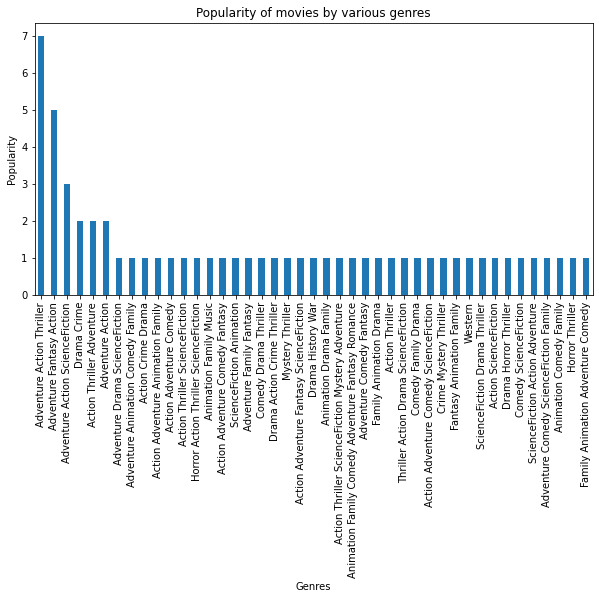

In [109]:
plt.figure(figsize=(10,5))
genre.plot.bar(title="Popularity of movies by various genres",xlabel="Genres",ylabel="Popularity");

In [54]:
runtime_genre = movies1_genre_multiple.groupby('genres').runtime.mean().sort_values()

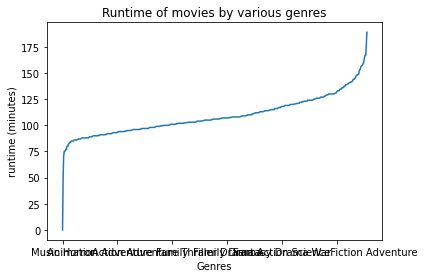

In [55]:
runtime_genre.plot.line(title = 'Runtime of movies by various genres',xlabel='Genres',ylabel='runtime (minutes)');

Line Plot that is present are based on the various genres - Best Runtime movies by genres

In [56]:
##source of quantilecut code https://medium.com/@onpillow/02-investigate-tmdb-movie-dataset-python-data-analysis-project-part-2-exploratory-data-4839f697092

def cut_into_quantile(dfname,column_name):
    """
        cut_into_quantile takes data frame and column name as param.
        returns the dataframe with an additional column "columnname_levels" and divide it into 4 quantiles.
    """
    ## find quartile,max and min values
    min_value = dfname[column_name].min()
    first_quantile = dfname[column_name].describe()[4]
    second_quantile = dfname[column_name].describe()[5]
    third_quantile = dfname[column_name].describe()[6]
    max_value = dfname[column_name].max()
    ## bin edges that will be used to cut data in groups
    bin_edges = [min_value,first_quantile,second_quantile,third_quantile,max_value]
    ## labels for the four budget level groups
    bin_names = ['Low','Medium','Moderately High','High']
    ## Create budget levels column
    name = '{}_levels'.format(column_name)
    dfname[name] = pd.cut(dfname[column_name],bin_edges,labels=bin_names,include_lowest=True)
    return dfname

In [57]:
movies1_non_zero_rev = movies1[movies1['revenue'] != 0]
movies1_data_revenue_bins = movies1_non_zero_rev[movies1_non_zero_rev['year'].isin([2010,2011,2012,2013,2014,2015])].copy()

In [58]:
movies1_data_revenue_quantile =  cut_into_quantile(movies1_data_revenue_bins,'revenue')

In [59]:
revenue_frame = movies1_data_revenue_quantile.groupby(['year','revenue_levels']).popularity.mean().to_frame()

In [60]:
revenue_frame.reset_index(level=0,inplace=True)

In [61]:
revenue_frame.reset_index(level=0,inplace=True)

In [62]:
low_revenue_pop = revenue_frame[revenue_frame['revenue_levels'] == 'Low'].popularity.tolist()
medium_revenue_pop = revenue_frame[revenue_frame['revenue_levels'] == 'Medium'].popularity.tolist()
mod_high_revenue_pop = revenue_frame[revenue_frame['revenue_levels'] == 'Moderately High'].popularity.tolist()
high_revenue_pop = revenue_frame[revenue_frame['revenue_levels'] == 'High'].popularity.tolist()

In [63]:
len(high_revenue_pop)
release_years = [2010,2011,2012,2013,2014,2015]

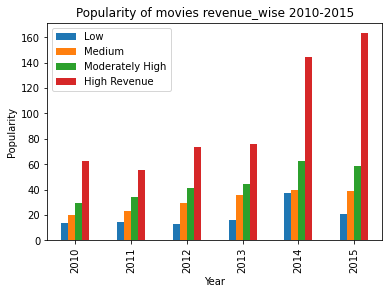

In [64]:
plotdata = pd.DataFrame({
    "Low": low_revenue_pop,
    "Medium": medium_revenue_pop,
    "Moderately High": mod_high_revenue_pop,
    "High Revenue": high_revenue_pop
},index=release_years)

plotdata.plot(kind='bar')
plt.title('Popularity of movies revenue_wise 2010-2015')
plt.xlabel("Year")
plt.ylabel("Popularity");

In [65]:
# Number of unique number of years in the dataset

movies1['year'].unique()

array([2009, 2007, 2015, 2012, 2010, 2016, 2008, 2006, 2013, 2011, 2014,
       1997, 2004, 2005, 2002, 1999, 2003, 2001, 2000, 1996, 1998, 1994,
       1993, 1995, 1990, 1989, 1987, 1992, 1982, 1983, 1979, 1985, 1984,
       1981, 1986, 1980, 1991, 1978, 1977, 1973, 1975, 1967, 1965, 1969,
       1988, 1971, 1972, 1974, 1964, 1939, 1940, 1963, 2017, 1937, 1966,
       1962, 1970, 1942], dtype=int64)

In [67]:
len(movies1['year'].unique())

58

In [68]:
release_year_latest = [2010,2011,2012,2013,2014,2015]

In [69]:
## running time bins
movies1_copy=movies1[movies1['year'].isin(release_year_latest)].copy()
movies1_copy = movies1_copy[movies1_copy['runtime'] != 900]
movies1_runtime_bins = cut_into_quantile(movies1_copy,'runtime')

In [70]:
# Finding number of longer movies that are popular than the shorter movies

movies1_copy[movies1_copy['runtime'] >= 170]

,title,genres,movie_id,overview,runtime,popularity,cast,crew,release_date,keywords,vote_average,vote_count,budget,revenue,tag,year,runtime_levels
207,The Wolf of Wall Street,[Crime Drama Comedy],106646,A N e w Y o r k s t o c k b r o k e r ...,180.0,95.007934,LeonardoDiCaprio JonahHill MargotRobbie,MartinScorsese,2013-12-25,corruption sex sexuality bank humor biography ...,7.9,6571,100000000,392000694,A N e w Y o r k s t o c k b r o k e r ...,2013,High
208,Cloud Atlas,[Drama ScienceFiction],83542,A s e t o f s i x n e s t e d s t o ...,172.0,73.872343,TomHanks HalleBerry JimBroadbent,TomTykwer,2012-10-26,clone future dystopia ensemblecast duringcredi...,6.6,2977,102000000,130482868,A s e t o f s i x n e s t e d s t o ...,2012,High


In [71]:
popularitybyruntime = movies1_runtime_bins.groupby(['year','runtime_levels']).popularity.median().to_frame()
popularitybyruntime.reset_index(inplace=True)

In [72]:
popularitybyruntime

,year,runtime_levels,popularity
0,2010,Low,15.212569
1,2010,Medium,20.544999
2,2010,Moderately High,24.117348
3,2010,High,19.805551
4,2011,Low,16.845745
5,2011,Medium,20.077149
6,2011,Moderately High,29.913530
7,2011,High,31.066874
8,2012,Low,14.182301
9,2012,Medium,20.908494


In [73]:
short_movie = popularitybyruntime[popularitybyruntime['runtime_levels'] == 'Low'].popularity.tolist()
medium_movie = popularitybyruntime[popularitybyruntime['runtime_levels'] == 'Medium'].popularity.tolist()
mod_long_movie = popularitybyruntime[popularitybyruntime['runtime_levels'] == 'Moderately High'].popularity.tolist()
long_movie = popularitybyruntime[popularitybyruntime['runtime_levels'] == 'High'].popularity.tolist()

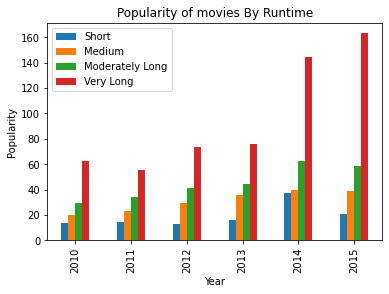

In [74]:
plotdata = pd.DataFrame({
    "Short": low_revenue_pop,
    "Medium": medium_revenue_pop,
    "Moderately Long": mod_high_revenue_pop,
    "Very Long": high_revenue_pop
},index=release_years)

plotdata.plot(kind='bar')
plt.title('Popularity of movies By Runtime')
plt.xlabel("Year")
plt.ylabel("Popularity");

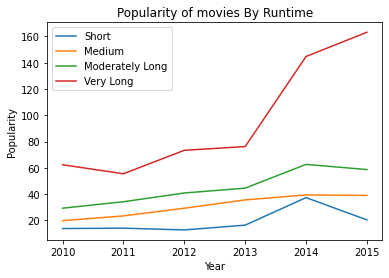

In [75]:
plotdata = pd.DataFrame({
    "Short": low_revenue_pop,
    "Medium": medium_revenue_pop,
    "Moderately Long": mod_high_revenue_pop,
    "Very Long": high_revenue_pop
},index=release_years)

plotdata.plot(kind='line')
plt.title('Popularity of movies By Runtime')
plt.xlabel("Year")
plt.ylabel("Popularity");

In [76]:
popularitybyruntime

,year,runtime_levels,popularity
0,2010,Low,15.212569
1,2010,Medium,20.544999
2,2010,Moderately High,24.117348
3,2010,High,19.805551
4,2011,Low,16.845745
5,2011,Medium,20.077149
6,2011,Moderately High,29.913530
7,2011,High,31.066874
8,2012,Low,14.182301
9,2012,Medium,20.908494


Very Long Movies were mostly played by  Popularity

In [77]:
vote_avgbyruntime = movies1_runtime_bins.groupby(['year','runtime_levels']).vote_average.mean().to_frame()

In [78]:
vote_avgbyruntime.reset_index(inplace=True)

In [79]:
vote_avgbyrunbins = vote_avgbyruntime[vote_avgbyruntime['year'].isin([2010,2011,2012,2013,2014,2015])].copy()

In [80]:
### 
short_movie_vote = vote_avgbyrunbins[vote_avgbyrunbins['runtime_levels'] == 'Low'].vote_average.tolist()
medium_movie_vote = vote_avgbyrunbins[vote_avgbyrunbins['runtime_levels'] == 'Medium'].vote_average.tolist()
mod_long_movie_vote = vote_avgbyrunbins[vote_avgbyrunbins['runtime_levels'] == 'Moderately High'].vote_average.tolist()
long_movie_vote = vote_avgbyrunbins[vote_avgbyrunbins['runtime_levels'] == 'High'].vote_average.tolist()

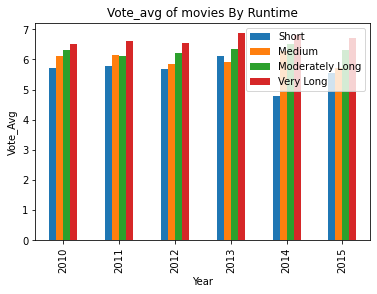

In [81]:
plotdata = pd.DataFrame({
    "Short": short_movie_vote,
    "Medium": medium_movie_vote,
    "Moderately Long": mod_long_movie_vote,
    "Very Long": long_movie_vote
},index=release_years)

plotdata.plot(kind='bar')
plt.title('Vote_avg of movies By Runtime')
plt.xlabel("Year")
plt.ylabel("Vote_Avg");

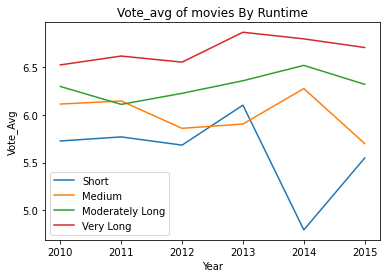

In [82]:
plotdata = pd.DataFrame({
    "Short": short_movie_vote,
    "Medium": medium_movie_vote,
    "Moderately Long": mod_long_movie_vote,
    "Very Long": long_movie_vote
},index=release_years)

plotdata.plot(kind='line')
plt.title('Vote_avg of movies By Runtime')
plt.xlabel("Year")
plt.ylabel("Vote_Avg");

Mostly People likes only the longest movies by runtime

In [83]:
movies1_c = movies1[movies1['budget']!=0].copy()
movies1_budget_group = cut_into_quantile(movies1_c,'budget')

In [84]:
movies1_budget_filtered_data = movies1_budget_group[movies1_budget_group['year'].isin([2010,2011,2012,2013,2014,2015])]
    
movies1_popularity_on_budget = movies1_budget_filtered_data.groupby(['year','budget_levels']).popularity.mean().to_frame().reset_index()

In [85]:
short_movie_vote = movies1_popularity_on_budget[movies1_popularity_on_budget['budget_levels'] == 'Low'].popularity.tolist()
medium_movie_vote = movies1_popularity_on_budget[movies1_popularity_on_budget['budget_levels'] == 'Medium'].popularity.tolist()
mod_long_movie_vote = movies1_popularity_on_budget[movies1_popularity_on_budget['budget_levels'] == 'Moderately High'].popularity.tolist()
long_movie_vote = movies1_popularity_on_budget[movies1_popularity_on_budget['budget_levels'] == 'High'].popularity.tolist()

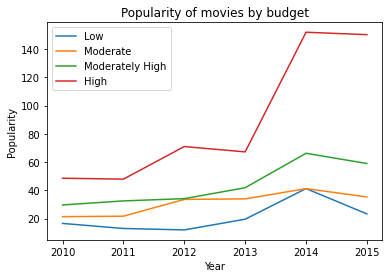

In [86]:
plotdata = pd.DataFrame({
    "Low": short_movie_vote,
    "Moderate": medium_movie_vote,
    "Moderately High": mod_long_movie_vote,
    "High": long_movie_vote
},index=release_years)

plotdata.plot(kind='line')
plt.title('Popularity of movies by budget')
plt.xlabel("Year")
plt.ylabel("Popularity");

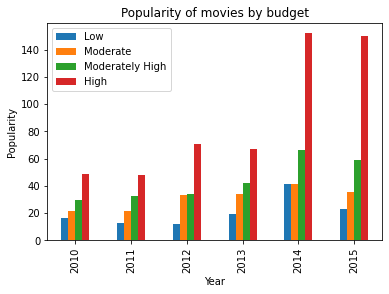

In [87]:
plotdata = pd.DataFrame({
    "Low": short_movie_vote,
    "Moderate": medium_movie_vote,
    "Moderately High": mod_long_movie_vote,
    "High": long_movie_vote
},index=release_years)

plotdata.plot(kind='bar')
plt.title('Popularity of movies by budget')
plt.xlabel("Year")
plt.ylabel("Popularity");

Say that the movies with higher budget is more popular in these years between 2010 - 2015

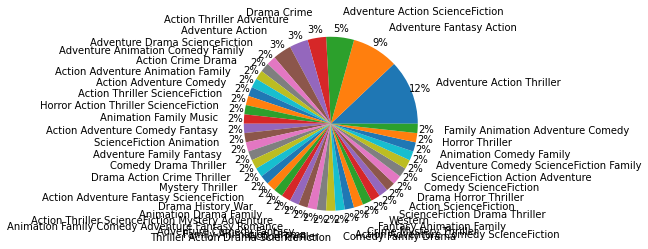

In [88]:
plt.pie(genre,labels=genre.index,autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.3);

In 2010 - 2015, Most watched genre is a combinations of the Adventure, Action and Thriller by 12 %
Followed by Adventure, Fantasy and Action with 9%

In [89]:
# Top 10 movies by Voting

top_10_movies_by_vote = movies1.sort_values(by = ['vote_average'],ascending = False)[['title','vote_average']].head(10)
top_10_movies_by_vote.reset_index(drop=True,inplace=True)
top_10_movies_by_vote.set_index('title',inplace=True)
top_10_movies_by_vote

,vote_average
title,
The Godfather,8.4
Schindler's List,8.3
Whiplash,8.3
Fight Club,8.3
Spirited Away,8.3
The Empire Strikes Back,8.2
GoodFellas,8.2
The Dark Knight,8.2
American History X,8.2


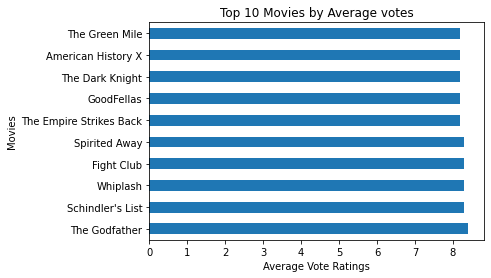

In [90]:
# Horizontal Bar Graph of the movies by their Votes

top_10_movies_by_vote.vote_average.plot(kind='barh')
plt.title('Top 10 Movies by Average votes')
plt.ylabel('Movies')
plt.xlabel('Average Vote Ratings');

Top 10 Movies that are listed by using the Votes/Voted of the audience

In [91]:
# Top 10 Movies by popularity

top_movie_by_pop = movies1.sort_values(by = ['popularity'],ascending = False)[['title','popularity']].head(10)
top_movie_by_pop.reset_index(drop=True,inplace=True)
top_movie_by_pop.set_index('title',inplace=True)
top_movie_by_pop

,popularity
title,
Minions,875.581305
Interstellar,724.247784
Deadpool,514.569956
Guardians of the Galaxy,481.098624
Mad Max: Fury Road,434.278564
Jurassic World,418.708552
Pirates of the Caribbean: The Curse of the Black Pearl,271.972889
Dawn of the Planet of the Apes,243.791743
The Hunger Games: Mockingjay - Part 1,206.227151


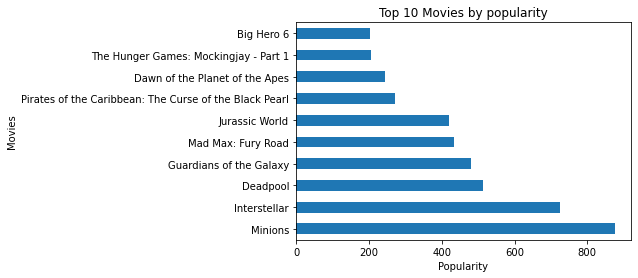

In [92]:
top_movie_by_pop.popularity.plot(kind='barh')
plt.title('Top 10 Movies by popularity')
plt.ylabel('Movies')
plt.xlabel('Popularity');

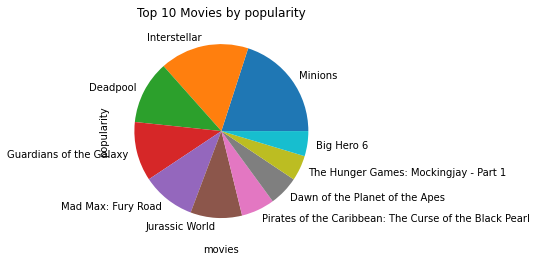

In [93]:
top_movie_by_pop.popularity.plot(kind='pie')
plt.title('Top 10 Movies by popularity')
plt.ylabel('popularity')
plt.xlabel('movies');

Above Pie Chart and Bar Chart is Listed of Top 10 movies by thier Popularity

In [94]:
# Month and number of movies released in that month

movies1['Month'] = movies1['release_date'].dt.month

In [95]:
# Number of movies that are released by each and every month

no_of_movies_by_month = movies1.groupby('Month').movie_id.count()
labels=['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec']

no_of_movies_by_month

Month
1      96
2     101
3     112
4     119
5     109
6     125
7     134
8     124
9     193
10    127
11    113
12    141
Name: movie_id, dtype: int64

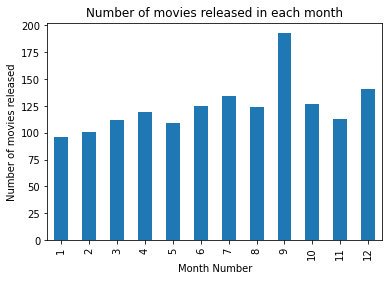

In [96]:
no_of_movies_by_month.plot(kind='bar',title="Number of movies released in each month",xlabel="Month Number",ylabel="Number of movies released",x=labels);

We have seen in the above bar graph by the analysis we have got the Month - 9 is the more number of movies released in the months

In [97]:
# Finding the Favourite movie month in a year

movies1_year_month_group = movies1.groupby(['year','Month']).movie_id.count()

In [98]:
movies1_year_month_group.to_frame().reset_index(drop=True,inplace=True)

In [99]:
movies1_year_month_group.groupby(level = 'year').nlargest(1).to_frame().head(10)

,,,movie_id
year,year,Month,
1937,1937,12,1
1939,1939,8,1
1940,1940,11,1
1942,1942,8,1
1962,1962,10,1
1963,1963,10,1
1964,1964,7,1
1965,1965,12,1
1966,1966,12,1


We have seen that the Year between 1937 to 1937 
Is Month - 12 is the Favourite to the every person wacthed as similarly to the other

In [100]:
movies1.head(2)

,title,genres,movie_id,overview,runtime,popularity,cast,crew,release_date,keywords,vote_average,vote_count,budget,revenue,tag,year,Month
0,Avatar,[Action Adventure Fantasy ScienceFiction],19995,"I n t h e 2 2 n d c e n t u r y , a ...",162.0,150.437577,SamWorthington ZoeSaldana SigourneyWeaver,JamesCameron,2009-12-10,cultureclash future spacewar spacecolony socie...,7.2,11800,237000000,2787965087,"I n t h e 2 2 n d c e n t u r y , a ...",2009,12
1,Pirates of the Caribbean: At World's End,[Adventure Fantasy Action],285,"C a p t a i n B a r b o s s a , l o n g ...",169.0,139.082615,JohnnyDepp OrlandoBloom KeiraKnightley,GoreVerbinski,2007-05-19,ocean drugabuse exoticisland eastindiatradingc...,6.9,4500,300000000,961000000,"C a p t a i n B a r b o s s a , l o n g ...",2007,5


In [101]:
# Joining all the genres columns words in to a paragragh

movies1['genres'] = movies1['genres'].apply(lambda x:" ".join(x))

In [102]:
movies1.head(3)

,title,genres,movie_id,overview,runtime,popularity,cast,crew,release_date,keywords,vote_average,vote_count,budget,revenue,tag,year,Month
0,Avatar,Action Adventure Fantasy ScienceFiction,19995,"I n t h e 2 2 n d c e n t u r y , a ...",162.0,150.437577,SamWorthington ZoeSaldana SigourneyWeaver,JamesCameron,2009-12-10,cultureclash future spacewar spacecolony socie...,7.2,11800,237000000,2787965087,"I n t h e 2 2 n d c e n t u r y , a ...",2009,12
1,Pirates of the Caribbean: At World's End,Adventure Fantasy Action,285,"C a p t a i n B a r b o s s a , l o n g ...",169.0,139.082615,JohnnyDepp OrlandoBloom KeiraKnightley,GoreVerbinski,2007-05-19,ocean drugabuse exoticisland eastindiatradingc...,6.9,4500,300000000,961000000,"C a p t a i n B a r b o s s a , l o n g ...",2007,5
2,Spectre,Action Adventure Crime,206647,A c r y p t i c m e s s a g e f r o m ...,148.0,107.376788,DanielCraig ChristophWaltz LéaSeydoux,SamMendes,2015-10-26,spy basedonnovel secretagent sequel mi6 britis...,6.3,4466,245000000,880674609,A c r y p t i c m e s s a g e f r o m ...,2015,10


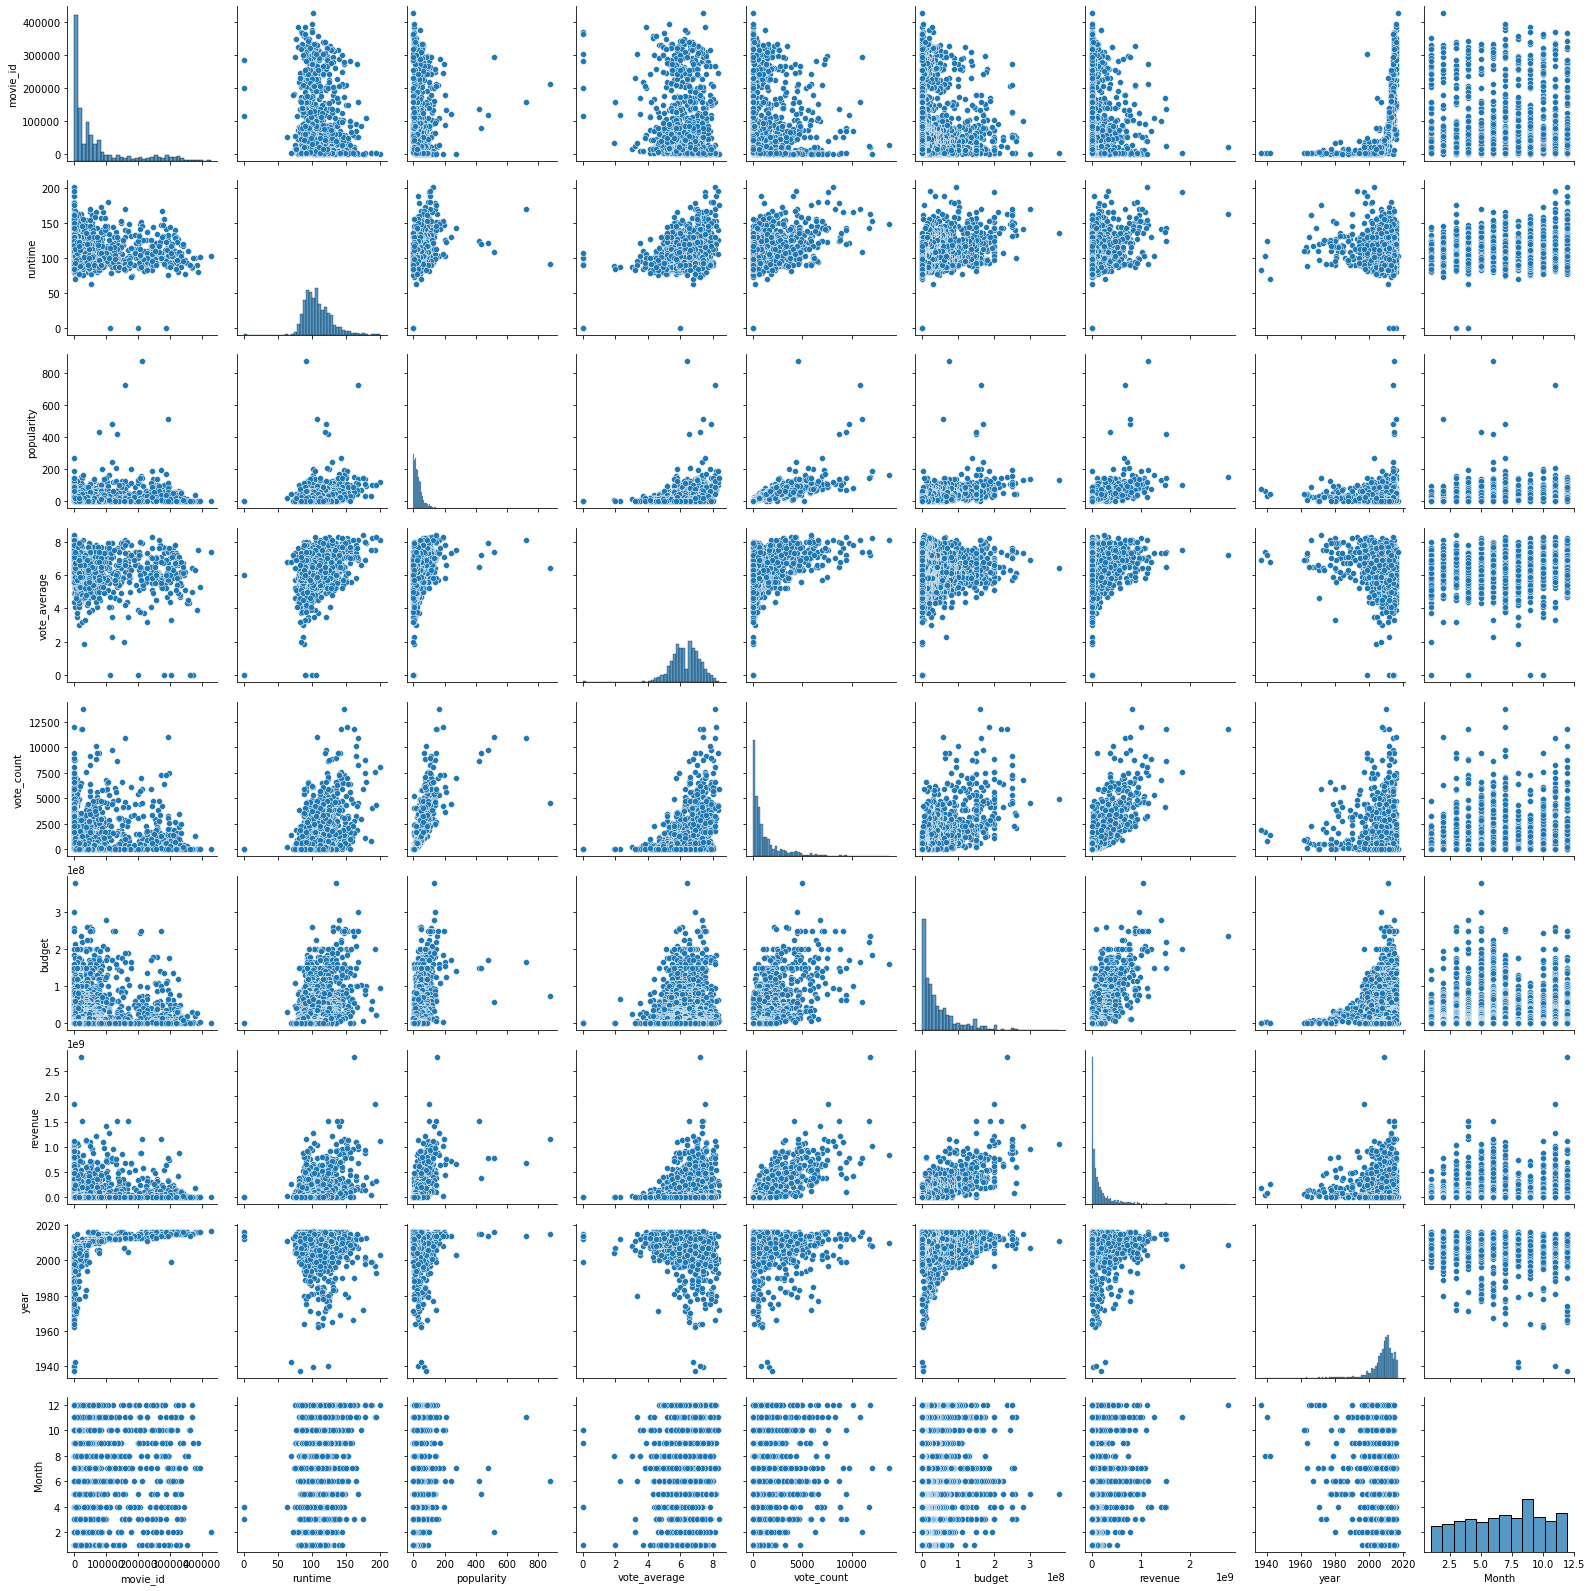

In [103]:
sns.pairplot(movies1)

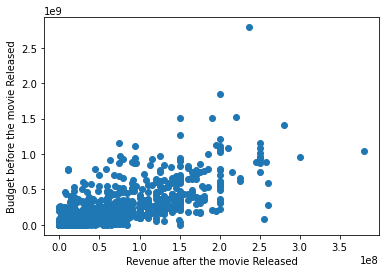

In [104]:
#Scatter Plot Vizualization for Revenue and Budget in the movie

plt.scatter(movies1['budget'],movies1['revenue'])

plt.xlabel('Revenue after the movie Released')
plt.ylabel('Budget before the movie Released')
plt.show()

<AxesSubplot:xlabel='revenue', ylabel='budget'>

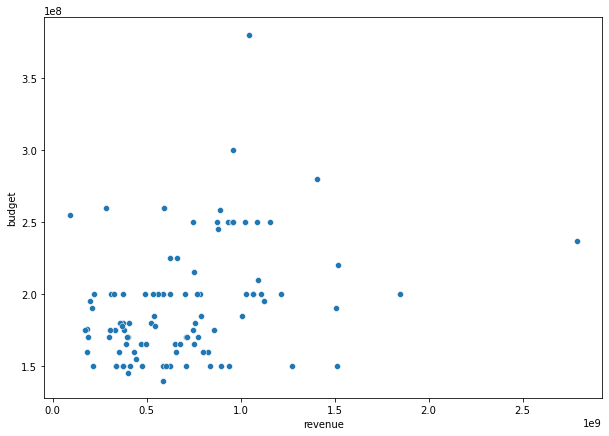

In [105]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='revenue',y='budget',data=movies1.head(100))

<AxesSubplot:>

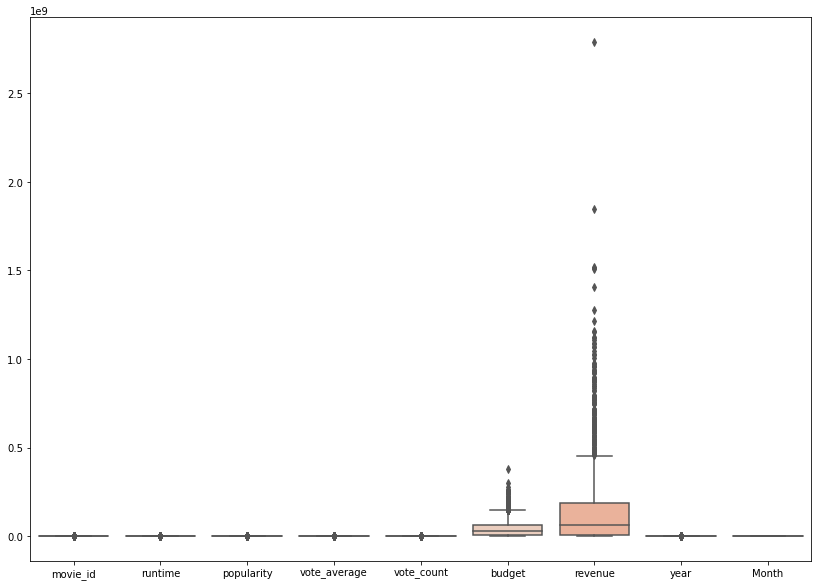

In [106]:
plt.figure(figsize=(14,10))
sns.boxplot(data=movies1,palette='coolwarm')

Text(0, 0.5, 'Runtime')

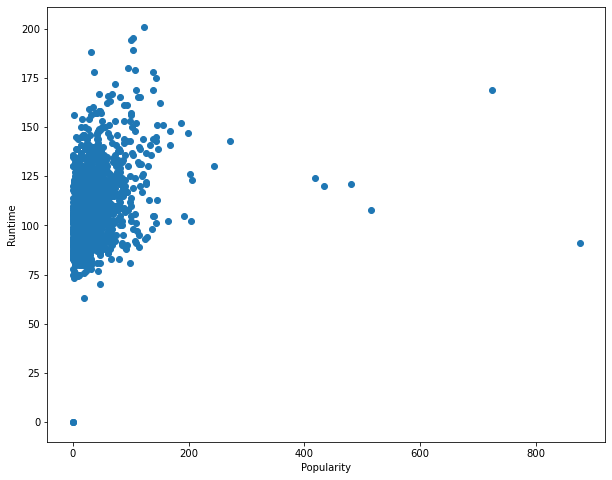

In [107]:
plt.figure(figsize=(10,8))
plt.scatter(movies1['popularity'],movies1['runtime'])
plt.xlabel('Popularity')
plt.ylabel('Runtime')